In [1]:
import os
import numpy as np
network_path = os.path.join("FS_forKadri-small-4")
duration = 10 # 22
osc_freq=20
period=1/osc_freq

input_name = f"SfN2022-forKadri-oscillating-{osc_freq}Hz-ramp-up-background"
sim_file_gj = os.path.join(network_path, "simulation", f"output-GJ-{input_name}.hdf5")
sim_file_nogj = os.path.join(network_path, "simulation", f"output-noGJ-{input_name}.hdf5")
fig_path = os.path.join(network_path, "figures")

if not os.path.exists(fig_path):
    os.mkdir(fig_path)

sl = None
sls_gj = None
sls_nogj = None

In [2]:
from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, 
                 snudda_data="../../../../BasalGangliaData/data/",
                 random_seed=1337)
cnc.define_striatum(num_dSPN=0, num_iSPN=0, num_FS=40, num_LTS=0, num_ChIN=0,
                    volume_type="cube", neuron_density=0.013*80500)
cnc.add_population_unit_random("Striatum","FS", 1.0, unit_id=1)
cnc.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Writing FS_forKadri-small-4/network-config.json


In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, verbose=False)
sp.place()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from FS_forKadri-small-4/network-config.json


In [4]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path)
sd.detect()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from FS_forKadri-small-4/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 114/343 (39 neurons)
Processing hyper voxel : 121/343 (38 neurons)
Processing hyper voxel : 163/343 (34 neurons)
Processing hyper voxel : 170/343 (33 neurons)
Processing hyper voxel : 115/343 (28 neurons)
Processing hyper voxel : 122/343 (25 neurons)
Processing hyper voxel : 113/343 (24 neurons)
Processing hyper voxel : 162/343 (23 neurons)
Processing hyper voxel : 65/343 (22 neurons)
Processing hyper voxel : 169/343 (22 neurons)
Processing hyper voxel : 72/343 (22 neurons)
Processing hyper voxel : 120/343 (22 neurons)
Processing hyper voxel : 164/343 (22 neurons)
Processing hyper voxel : 107/343 (21 neurons)
Processing hyper voxel : 171/343 (17 neurons)
Processing hyper voxel : 157/343 (15 neurons)
Processing hyper voxel : 156/343 (14 neurons)
Processing hyper voxel : 66/343 (13 neurons)
Processing hyper 

In [5]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

Read 5417 out of total 5417 synapses
Read 548 out of total 548 gapJunctions


Change the line below from "markdown" to "code", and run it to create the mechanisms for NEURON

!nrnivmodl $SNUDDA_DATA/neurons/mechanisms

In [6]:
input_config_file="SfN2022-forKadri-oscillating-20Hz-ramp-up-background.json"
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path, 
                 input_config_file=input_config_file,
                 time=duration, verbose=False)
si.generate()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from FS_forKadri-small-4/network-config.json
Loading 40 neurons with 488 synapses and 147 gap junctions
!!! Warning, combining definition of cortical_background input for neuron FS_3 0 (meta modified by input_config)
!!! Warning, combining definition of cortical_background input for neuron FS_0 1 (meta modified by input_config)
!!! Warning, combining definition of cortical_background input for neuron FS_2 2 (meta modified by input_config)
!!! Warning, combining definition of cortical_background input for neuron FS_1 3 (meta modified by input_config)
!!! Warning, combining definition of cortical_background input for neuron FS_3 4 (meta modified by input_config)
!!! Warning, combining definition of cortical_background input for neuron FS_1 5 (meta modified by input_config)
!!! Warning, combining definition of cortical_background input for neuron FS_0 6 (meta modified by input_config)
!!! Warning, combining definition of cortical_back

Loading 40 neurons with 488 synapses and 147 gap junctions


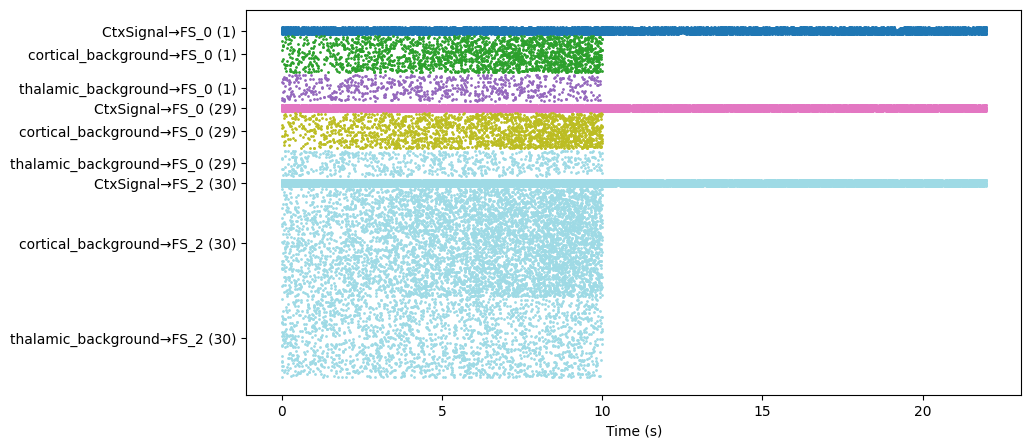

In [7]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file)
spi.plot_input("FS",3)

In [8]:
os.system(f"mpiexec -n 3 snudda simulate {network_path} --time {duration} --outputFile {sim_file_gj}")

numprocs=3
Using input file FS_forKadri-small-4/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from FS_forKadri-small-4/network-config.json
Worker waiting for master node to compile NEURON modules.
Using input file FS_forKadri-small-4/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from FS_forKadri-small-4/network-config.json
Running on master node:  nrnivmodl /home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms
Using input file FS_forKadri-small-4/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from FS_forKadri-small-4/network-config.json
Worker waiting for master node to compile NEURON modules.
/home/hjorth/HBP/Snudda/examples/notebooks/FS-network
Mod files: "/home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms//home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms/bk_ch.mod" "/home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms//home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms/bk_fs

0

In [9]:
os.system(f"mpiexec -n 3 snudda simulate {network_path} --time {duration} --outputFile {sim_file_nogj} --disableGJ")

numprocs=3
Using input file FS_forKadri-small-4/input-spikes.hdf5
Using input file FS_forKadri-small-4/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from FS_forKadri-small-4/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from FS_forKadri-small-4/network-config.json
Worker waiting for master node to compile NEURON modules.
Worker waiting for master node to compile NEURON modules.
Using input file FS_forKadri-small-4/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from FS_forKadri-small-4/network-config.json
Running on master node:  nrnivmodl /home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms
/home/hjorth/HBP/Snudda/examples/notebooks/FS-network
Mod files: "/home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms//home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms/bk_ch.mod" "/home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms//home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms/bk_fs

0

# Analysis

In [10]:
from snudda.utils import SnuddaLoad
from snudda.utils import SnuddaLoadNetworkSimulation

sl = SnuddaLoad(network_path)
sls_gj = SnuddaLoadNetworkSimulation(network_simulation_output_file=sim_file_gj)
sls_nogj = SnuddaLoadNetworkSimulation(network_simulation_output_file=sim_file_nogj)

Loading 40 neurons with 488 synapses and 147 gap junctions
Loading FS_forKadri-small-4/simulation/output-GJ-SfN2022-forKadri-oscillating-20Hz-ramp-up-background.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
17: (FS_0, pb1ef6b01, mb1b67bcc)
26: (FS_1, pf9439e45, m48f576bb)
33: (FS_1, pf86c86e4, ma88f99b9)
37: (FS_0, p4feff98b, m86da4874)
Loading FS_forKadri-small-4/simulation/output-noGJ-SfN2022-forKadri-oscillating-20Hz-ramp-up-background.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
17: (FS_0, pb1ef6b01, mb1b67bcc)
24: (FS_0, pb1ef6b01, m4cd420e2)
26: (FS_1, pf9439e45, m48f576bb)


In [11]:
from snudda.plotting import SnuddaPlotSpikeRaster2

spr = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=sim_file_gj, figure_path=fig_path,
                             snudda_load=sl, snudda_simulation_load=sls_gj)

spr2 = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=sim_file_nogj, figure_path=fig_path,
                              snudda_load=sl, snudda_simulation_load=sls_nogj)

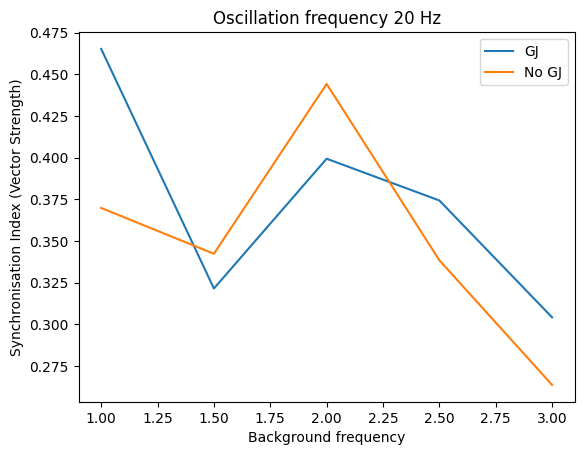

In [12]:
start_time = spi.config["FS"]["cortical_background"]["start"]
end_time =  spi.config["FS"]["cortical_background"]["end"]
background_frequency = spi.config["FS"]["cortical_background"]["frequency"]

synch_gj = []
synch_nogj = []

for st, et in zip(start_time, end_time):
    synch_gj.append(spr.calculate_period_synchrony(period=period, time_range=(st,et)))
    synch_nogj.append(spr2.calculate_period_synchrony(period=period, time_range=(st,et)))

synch_gj = np.array(synch_gj)
synch_nogj = np.array(synch_nogj)
    
import matplotlib.pyplot as plt

plt.figure()
plt.plot(background_frequency, synch_gj, label="GJ")
plt.plot(background_frequency, synch_nogj, label="No GJ")
plt.legend()
plt.xlabel("Background frequency")
plt.ylabel("Synchronisation Index (Vector Strength)")
plt.title(f"Oscillation frequency {osc_freq} Hz")
plt.savefig(f"{fig_path}/SfN2022-synchronisation-index-osc-{osc_freq}-Hz-background-varied.png")

Saving figure to FS_forKadri-small-4/figures/spike-raster-GJ.pdf


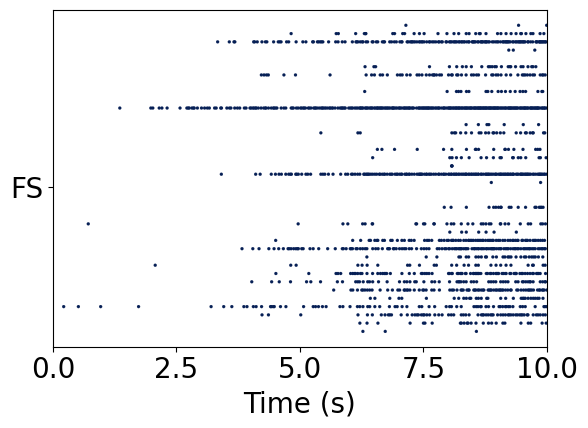

In [13]:
spr.plot_spike_raster(fig_file=f"spike-raster-GJ.pdf")

Saving figure to FS_forKadri-small-4/figures/spike-raster-noGJ.pdf


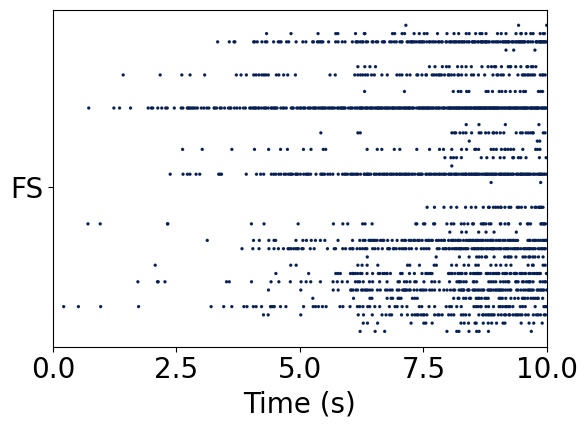

In [14]:
spr2.plot_spike_raster(fig_file=f"spike-raster-noGJ.pdf")

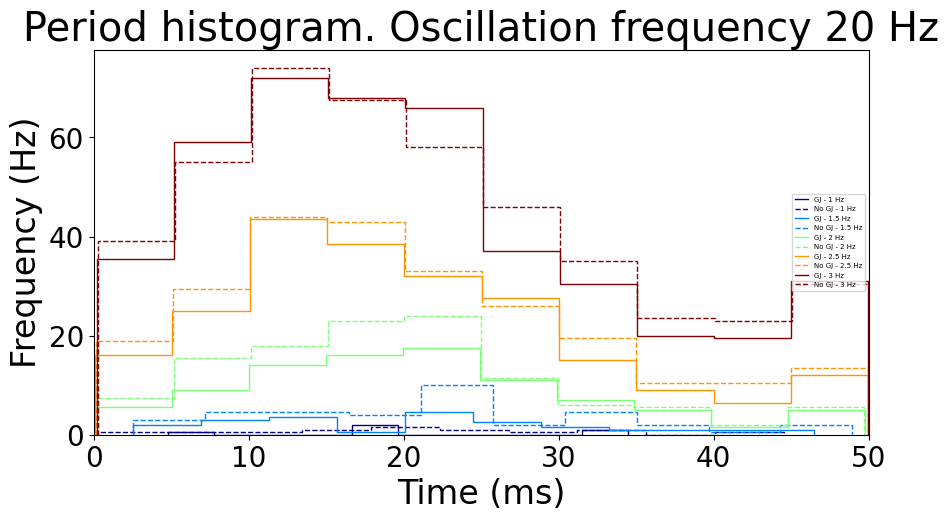

In [15]:
start_time = spi.config["FS"]["cortical_background"]["start"]
end_time =  spi.config["FS"]["cortical_background"]["end"]
background_frequency = spi.config["FS"]["cortical_background"]["frequency"]

if False:
    idx = [0, 7, 9, 10, 11, 15, 16]
    start_time = [start_time[x] for x in idx]
    end_time = [end_time[x] for x in idx]
    background_frequency = [background_frequency[x] for x in idx]

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
colours = plt.cm.jet(np.linspace(0,1,len(start_time)))


for st, et, bg, colour in zip(start_time, end_time, background_frequency, colours):
    freq_gj, bins_gj = spr.calculate_period_histogram_mod(period=period, time_range=(st,et), neuron_id=None)
    freq_nogj, bins_nogj = spr2.calculate_period_histogram_mod(period=period, time_range=(st,et), neuron_id=None)

    plt.stairs(freq_gj, bins_gj*1e3, label=f"GJ - {bg} Hz", linestyle="solid", color=colour)
    plt.stairs(freq_nogj, bins_nogj*1e3, label=f"No GJ - {bg} Hz", linestyle="dashed", color=colour)
    
plt.legend(loc="center right", fontsize=5)
plt.xlim((0, period*1e3))
plt.xlabel("Time (ms)")
plt.ylabel("Frequency (Hz)")
plt.title(f"Period histogram. Oscillation frequency {osc_freq} Hz")
plt.savefig(f"{fig_path}/SfN2022-period-histogram-osc-{osc_freq}-Hz-background-varied.png")